**Ultimate Car Share Data Science Challenege**

In [1]:
#import packages
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#matplotlib settings
#% matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(9,6))

<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

In [3]:
#load logins.json as pd dataframe
df_logins = pd.read_json("logins.json")
df_logins.head(10)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41
6,1970-01-01 20:12:16
7,1970-01-01 20:35:47
8,1970-01-01 20:35:38
9,1970-01-01 20:47:52


In [4]:
#inspect dataframe
df_logins.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [5]:
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.7 KB


In [6]:
df_logins.head().isna().sum()

login_time    0
dtype: int64

*Part One*

Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,such as daily cycles. If there are data quality issues, please report them.

In [7]:
type(df_logins['login_time'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df_logins['time'] = pd.to_datetime(df_logins['login_time'])

In [9]:
df_logins = df_logins[['time']]

In [10]:
df_logins['count'] = 1

In [11]:
df_logins.head()

,time,count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [12]:
df_logins.set_index('time', inplace=True)

In [13]:
df_logins.head()

,count
time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [14]:
df_logins = df_logins.resample('15T').sum()

In [15]:
df_logins.head()
df_logs = df_logins.reset_index()

In [16]:
df_logs.head()

,time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


(array([  0.,  14.,  31.,  45.,  59.,  73.,  90., 104.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

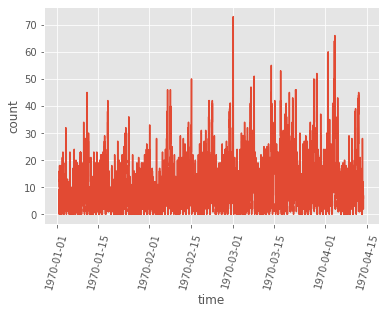

In [17]:
sns.lineplot(x='time',y='count', data=df_logs)
plt.xticks(rotation=75)

(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

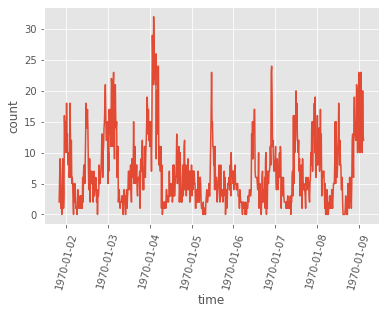

In [18]:
sns.lineplot(x='time',y='count', data=df_logs[0:700])
plt.xticks(rotation=75)

In [19]:
df_logs.describe()  #max logs of 73 in a 15-min interval, as low as 0, 50% of 7

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [20]:
import datetime as dt
df_logs['day_of_week'] = df_logs['time'].dt.day_name()

In [21]:
df_logs.head()

,time,count,day_of_week
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


<AxesSubplot:xlabel='day_of_week', ylabel='count'>

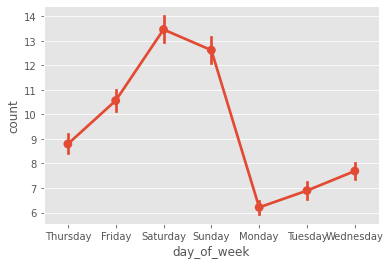

In [22]:
sns.pointplot(x='day_of_week',y='count', data=df_logs)

#Saturday and then Sunday are the peak days
#Monday, Tuesday, and Wednesday are quite low

*Part 2*

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

*A few key measures of success - for driver partners to serve both cities - would be: i) traffic/waiting time to access both cities should be similar and balanced; ii) seeing a equal, or a more balanced, rate of drivers accessing both cities during similar times of the day; iii) total mileage by each driver per day and per week. *

Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 

a. how you will implement the experiment?

b. what statistical test(s) you will conduct to verify the significance of the observation

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats. 

*This experiment could be conducted by tracking the drivers across the bridge, to where and when they access each of the cities over the course of a few weeks (would need every day of the week accounted for) to establish a control dataset. Then to conudct the experiment, all drivers from the control group would be informed of their fully reimbursed toll fees, that they can freely access both cities without toll costs, but not to encourage any changes of behavior. It will be critical to see how driver behavior changes before and after the toll fee changes. Since there are now two groups (before/after toll fees) we can perform a t-test on the drvier logs to determine if there was any significant changes to driver behavior on a daily and/or weekly basis. If the t-test. If the effect size from the t-test is greater than 0.2, I would recommend the proposed change to the toll fee for driver's as a potential step in balancing the driver dispersion between Gotham and Metropolis.*

*Part   3   ‑   Predictive   modeling*
 
Ultimate   is   interested   in   predicting   rider   retention.   To   help   explore   this   question,   we   have 
provided   a   sample   dataset   of   a   cohort   of   users   who   signed   up   for   an   Ultimate   account   in 
January   2014.   The   data   was   pulled   several   months   later;   we   consider   a   user   retained   if   they 
were   “active”   (i.e.   took   a   trip)   in   the   preceding   30   days. 
 
We   would   like   you   to   use   this   data   set   to   help   understand   what   factors   are   the   best   predictors 
for   retention,   and   offer   suggestions   to   operationalize   those   insights   to   help   Ultimate. 
 
The   data   is   in   the   attached   file   ultimate_data_challenge.json.   See   below   for   a   detailed 
description   of   the   dataset.   Please   include   any   code   you   wrote   for   the   analysis   and   delete   the 
dataset   when   you   have   finished   with   the   challenge. 
 
1. Perform   any   cleaning,   exploratory   analysis,   and/or   visualizations   to   use   the   provided 
data   for   this   analysis   (a   few   sentences/plots   describing   your   approach   will   suffice).   What 
fraction   of   the   observed   users   were   retained? 
2. Build   a   predictive   model   to   help   Ultimate   determine   whether   or   not   a   user   will   be   active 
in   their   6th   month   on   the   system.   Discuss   why   you   chose   your   approach,   what 
alternatives   you   considered,   and   any   concerns   you   have.   How   valid   is   your   model? 
Include   any   key   indicators   of   model   performance. 
3. Briefly   discuss   how   Ultimate   might   leverage   the   insights   gained   from   the   model   to 
improve   its   long­ term   rider   retention   (again,   a   few   sentences   will   suffice)

In [23]:
#load json dataset as pandas dataframe
df = pd.read_json("ultimate_data_challenge.json")
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [24]:
df.shape  #(50000,12)

(50000, 12)

In [25]:
df.isna().sum()   #"avg_rating_of_driver","surge_pct","avg_rating_by_driver"

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [26]:
#What variables help predict "retention"
#if user took a trip within 30-days of signing up, then yes (retained)

In [27]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.5+ MB


In [29]:
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [30]:
df.signup_date.value_counts()  
#all sign-up dates are in January

2014-01-18    2948
2014-01-25    2885
2014-01-11    2402
2014-01-24    2284
2014-01-17    2149
2014-01-31    2100
2014-01-19    2028
2014-01-10    2021
2014-01-06    1763
2014-01-01    1737
2014-01-26    1708
2014-01-23    1606
2014-01-07    1486
2014-01-04    1485
2014-01-30    1471
2014-01-09    1433
2014-01-16    1431
2014-01-22    1369
2014-01-05    1343
2014-01-12    1334
2014-01-20    1295
2014-01-28    1284
2014-01-08    1275
2014-01-27    1236
2014-01-21    1234
2014-01-03    1213
2014-01-29    1197
2014-01-14    1120
2014-01-15    1110
2014-01-13    1049
2014-01-02    1004
Name: signup_date, dtype: int64

In [31]:
#add a column for the date 6-months from "sign_up" date

In [32]:
#add column "active_user" as a binary value (0: not-retained; 1-retained)
'''we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days [following their initial signup date].'''

df['active_user'] = [1 if x.month >= 6 else 0 for x in df.last_trip_date]

In [33]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


<AxesSubplot:xlabel='active_user', ylabel='count'>

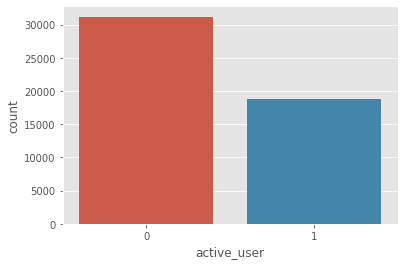

In [34]:
#visualize the ratio of active_users (0,1)
sns.countplot(x='active_user', data=df)  #more 0 than 1; more non-active users than active

In [35]:
#percent of active users
print('Percent of active users: ' + str(sum(df.active_user)/len(df.active_user)))

Percent of active users: 0.37608


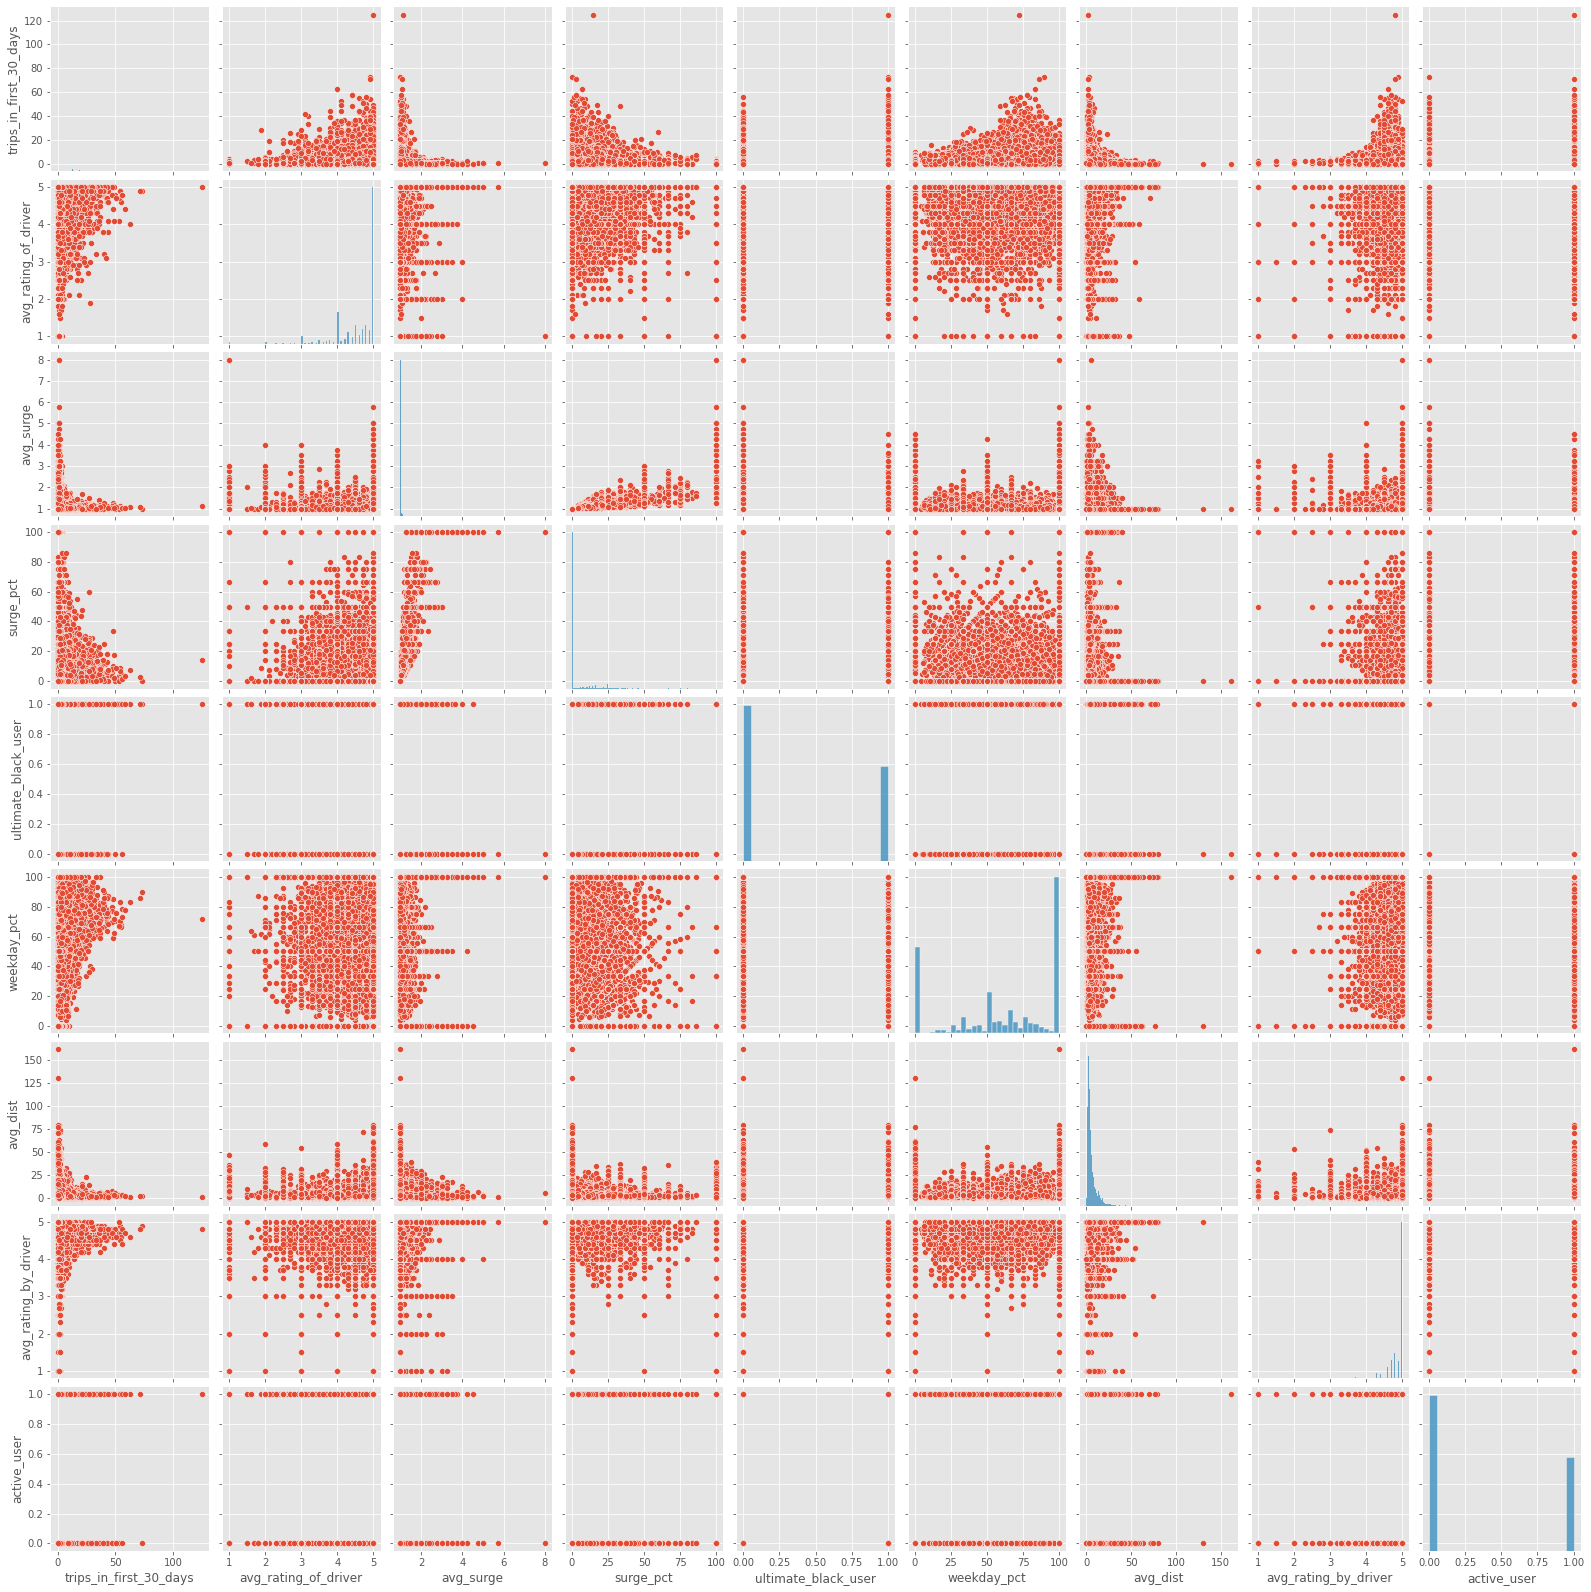

In [36]:
sns.pairplot(df)

**Model Selection**

There are a number of features in the dataset that can be evaluated for determining their effect and magnitude in predicting a "retained" rider.

*Since we are determining a binary classification for rider retention (0 or 1) on their 6th month following signup, and there are various continuous and categorical data to be utilized in building the model, a Logistic Regression might be a strong initial case.*

*Other supervised learning model options to test will be a Regression Tree, KNN, and/or Naive Bayes*

In [37]:
#pd.get_dummies() for categorical values
df_dummy = pd.get_dummies(df)
df_dummy.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0


In [38]:
df_dummy['ultimate_black'] = [1 if x == True else 0 for x in df_dummy.ultimate_black_user]

In [39]:
#subset dataframe to remove the date columns
df_dummy.columns
df_1 = df_dummy.drop(columns = ['signup_date','last_trip_date','ultimate_black_user'])
df_1.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_user,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,0,1,0,0,1,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,1,0,0,0,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,0,1,0,0,1,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,0,1,1,0,0


In [40]:
df = df_1

In [41]:
df.isna().sum()

trips_in_first_30_days       0
avg_rating_of_driver      8122
avg_surge                    0
surge_pct                    0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active_user                  0
city_Astapor                 0
city_King's Landing          0
city_Winterfell              0
phone_Android                0
phone_iPhone                 0
ultimate_black               0
dtype: int64

In [42]:
df1 = df.ffill(axis=1)

In [43]:
df1.isna().sum()

trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
surge_pct                 0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active_user               0
city_Astapor              0
city_King's Landing       0
city_Winterfell           0
phone_Android             0
phone_iPhone              0
ultimate_black            0
dtype: int64

In [44]:
df = df1

In [45]:
df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'active_user', 'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone', 'ultimate_black'],
      dtype='object')

**Import LinearRegression from sklearn; create x and y (predictive) variables**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
x = df[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
        'city_Astapor', "city_King's Landing", 'city_Winterfell']]

In [48]:
y = df.active_user

**train_test_split on dataset**

In [49]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [50]:
#call an instance of the LogisticRegression(), fit, predict
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

LogisticRegression()

In [51]:
y_pred = logReg.predict(x_test)

 
Predicted   0.0   1.0
Actual               
0.0        8140  1239
1.0        3334  2287


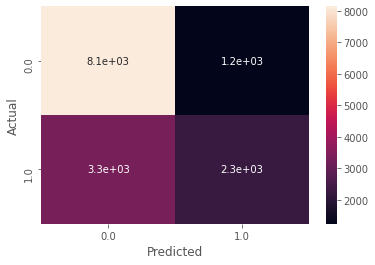

In [52]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print(" ")
print(confusion_matrix)

In [53]:
#Accuracy Score via accuracy_score
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.6951333333333334


**Logistic Regression: Accuracy = 70%**

In [54]:
#Cross Validation
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(logReg, x, y, cv=5)
print("Cross Validation Results: " + str(cv_results))
print("Cross Validation Mean: " + str(np.mean(cv_results)))

Cross Validation Results: [0.6977 0.692  0.6951 0.6906 0.6994]
Cross Validation Mean: 0.69496


In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
probs = logReg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("ROC-AUC value: " +str(roc_auc))
#probs_auc = roc_auc_score(y_test, y_pred)
#print(probs_auc)

ROC-AUC value: 0.7081604121931755


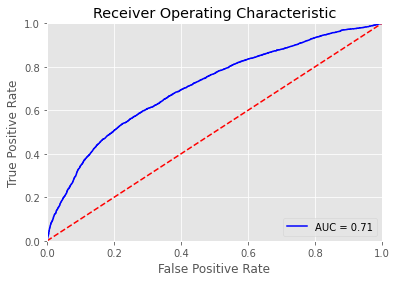

In [56]:
#ROC_Curve plot
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
#cross_val_score using best cv scores
from sklearn.model_selection import cross_val_score
cv_auc = cross_val_score(logReg, x, y, cv=5, scoring = 'roc_auc')

print("AUC scores from 5-fold cv: " + str(cv_auc))

AUC scores from 5-fold cv: [0.71265428 0.7089031  0.71276413 0.70699035 0.71229989]


In [58]:
#hyperparamter grid testing and evaluation
from sklearn.model_selection import GridSearchCV
c_space = np.logspace(-5,5,10)
param_grid = {'C':c_space}

logReg = LogisticRegression()

logreg_cv =  GridSearchCV(logReg, param_grid, cv=5)
logreg_cv.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 1.29154967e-04, 1.66810054e-03, 2.15443469e-02,
       2.78255940e-01, 3.59381366e+00, 4.64158883e+01, 5.99484250e+02,
       7.74263683e+03, 1.00000000e+05])})

In [59]:
#continue the gridearch cross-validation
print("Logistic Regression 'C' parameter: " + str(logreg_cv.best_params_))
print(" ")
print("Logistic Regression Best Score: " + str(logreg_cv.best_score_))

Logistic Regression 'C' parameter: {'C': 0.0016681005372000592}
 
Logistic Regression Best Score: 0.69748


Feature: 0, Score: 0.12455
Feature: 1, Score: 0.12090
Feature: 2, Score: -0.18008
Feature: 3, Score: 0.00164
Feature: 4, Score: -0.00017
Feature: 5, Score: -0.02853
Feature: 6, Score: -0.11979
Feature: 7, Score: -0.73339
Feature: 8, Score: 0.87795
Feature: 9, Score: -0.31458


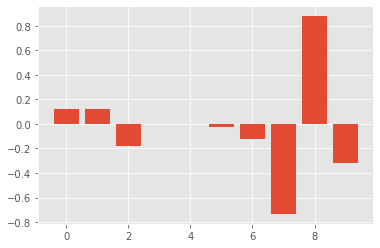

In [60]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

logReg = LogisticRegression()
logReg.fit(x,y)
importance = logReg.coef_[0]

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [61]:
#prediction on test data
from sklearn.metrics import accuracy_score
y_pred = logReg.predict(x_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy score: " + str(accuracy * 100))

Accuracy score: 69.46666666666667


**Conclusions & Discussion of Results**

I determined the proportion of active users based on activity six months following each users respective month of initial signup (~38%). Then I analyzed continous data (e.g. "avg_rating_of_driver") and categorical data ("ultimate_black"), and identified critical features of the dataset that might best be suitable for building a predictive model - predicting active users based on the historical dataset. Since the client requested a binary classification (if either the user will be active or not), I chose a Logistic Regression mode, which showed an accuracy score of 71%. 

It wasn't clear how the "active user" was fully defined by the client, yet this model provides a good baseline estimation of predicting success. Additional features for the Ultimate users might improve model predictive accuracy, such as race, age, and other demographical information. Also, scaling continuous data features might be helpful. For example, driver and rider ratings tend to be >3 while rarely being 0-1. Improving on the feature selection, sclaing, and data availability will likely improve model accuracy without changing parameters.